In [21]:
import pandas as pd
import numpy as np
import ssl
from collections import Counter
import matplotlib.pyplot as plt


ssl._create_default_https_context = ssl._create_unverified_context
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)


url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipo = pd.read_csv(url, sep='\\t',engine='python')

print(chipo.head(10))

#Create a histogram of the top 5 items bought



   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                                                                    choice_description  \
0                                                                                                  NaN   
1                                                                                  

In [22]:
x = chipo.item_name

letter_counts = Counter(x)

# counter() is the value_counts()   get.unique.tolist()

In [23]:
letter_counts 

Counter({'Chips and Fresh Tomato Salsa': 110,
         'Izze': 20,
         'Nantucket Nectar': 27,
         'Chips and Tomatillo-Green Chili Salsa': 31,
         'Chicken Bowl': 726,
         'Side of Chips': 101,
         'Steak Burrito': 368,
         'Steak Soft Tacos': 55,
         'Chips and Guacamole': 479,
         'Chicken Crispy Tacos': 47,
         'Chicken Soft Tacos': 115,
         'Chicken Burrito': 553,
         'Canned Soda': 104,
         'Barbacoa Burrito': 91,
         'Carnitas Burrito': 59,
         'Carnitas Bowl': 68,
         'Bottled Water': 162,
         'Chips and Tomatillo Green Chili Salsa': 43,
         'Barbacoa Bowl': 66,
         'Chips': 211,
         'Chicken Salad Bowl': 110,
         'Steak Bowl': 211,
         'Barbacoa Soft Tacos': 25,
         'Veggie Burrito': 95,
         'Veggie Bowl': 85,
         'Steak Crispy Tacos': 35,
         'Chips and Tomatillo Red Chili Salsa': 48,
         'Barbacoa Crispy Tacos': 11,
         'Veggie Salad Bowl': 1

In [24]:
df=pd.DataFrame.from_dict(letter_counts, orient='index')

df.head(5)

,0
Chips and Fresh Tomato Salsa,110
Izze,20
Nantucket Nectar,27
Chips and Tomatillo-Green Chili Salsa,31
Chicken Bowl,726


Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: 0, dtype: int64


Text(0.5, 1.0, 'Most ordered Chipotle Items')

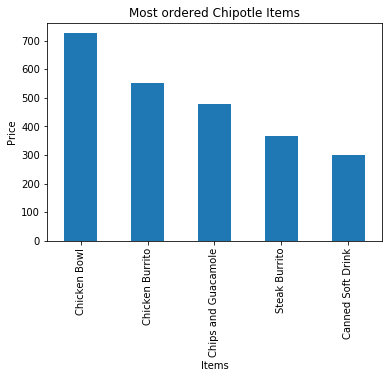

In [25]:
# sort the values from the top to the least value and slice the first 5 items
df = df[0].sort_values(ascending = False)[0:5]
print(df)

# create the plot\n",
df.plot(kind='bar')

# Set the title and labels
plt.xlabel('Items')
plt.ylabel('Price')
plt.title('Most ordered Chipotle Items')

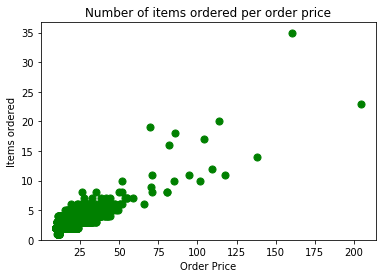

In [27]:
# then groupby the orders and sum\n",

chipo.item_price = [float(value[1:-1]) for value in chipo.item_price]

orders = chipo.groupby('order_id').sum()


# creates the scatterplot


plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'green')

# Set the title and labels

plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)
plt.show()